# Recognition of clothing items (fashionMNIST) with Convolutional Neural Networks

- start with a working Keras model trained on MNIST
- change the input shape to (28, 28, 1)
- replace the Dense layers by 2D Convolutional layers
- add MaxPooling layers after the convolutionals
- add a Flatten layer before the final dense/softmax layer
- make sure it works
- add regularization techniques (Dropout, BatchNorm)
- experiment with the number of feature maps
- see whether peformance increase

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scale the pixel values to a range of 0 to 1 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CNN Model

In [6]:
# from the book G.Bonaccorso p.580

nb_classes = 10
train_batch_size = 256
test_batch_size = 100
nb_epochs = 100
steps_per_epoch = 1500

Use the class `ImageDataGenerator` to add random transformations (horizontal flip, zoom, small rotations, small shears). This should improve the generalization of the CNN.

In [11]:
train_idg = ImageDataGenerator(rescale=1.0/255.0,
                               samplewise_center=True,
                               samplewise_std_normalization=True,
                               horizontal_flip=True,
                               rotation_range=10.0,
                               shear_range=np.pi/12.0,
                               zoom_range=0.25)

train_dg = train_idg.flow(x=np.expand_dims(X_train, axis=3),
                          y=to_categorical(y_train, num_classes=nb_classes),
                          batch_size=train_batch_size,
                          shuffle=True,
                          seed=1000)

test_idg = ImageDataGenerator(rescale=1.0/255.0,
                               samplewise_center=True,
                               samplewise_std_normalization=True)

test_dg = train_idg.flow(x=np.expand_dims(X_test, axis=3),
                          y=to_categorical(y_test, num_classes=nb_classes),
                          batch_size=test_batch_size,
                          shuffle=True,
                          seed=1000)

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32,
                        kernel_size=(3,3),
                        padding='same',
                        input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(128,
                        kernel_size=(3,3),
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(128,
                        kernel_size=(3,3),
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(50))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Dense(nb_classes,
                       activation='softmax'))

In [18]:
"""
#page582

model = models.Sequential()

model.add(layers.Conv2D(32,
                        kernel_size=(3,3),
                        padding='same',
                        input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(64,
                        kernel_size=(3,3),
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(128,
                        kernel_size=(3,3),
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(128,
                        kernel_size=(3,3),
                        padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Dense(nb_classes,
                       activation='softmax'))

"""

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
history = model.fit_generator(generator=train_dg,
                              epochs=10,#nb_epochs,
                              steps_per_epoch=100,
                              validation_data=test_dg,
                              validation_steps=int(X_test.shape[0] / test_batch_size),
                              callbacks=[keras.callbacks.ReduceLROnPlateau(
                                  factor=0.1,
                                  patience=1,
                                  cooldown=1,
                                  min_lr=1e-6
                              )])

Epoch 1/10
100/100 [==============================] - 592s 6s/step - loss: 0.6359 - accuracy: 0.7895 - val_loss: 1.3825 - val_accuracy: 0.5958
Epoch 2/10
100/100 [==============================] - 587s 6s/step - loss: 0.4539 - accuracy: 0.8447 - val_loss: 0.8642 - val_accuracy: 0.7098
Epoch 3/10
100/100 [==============================] - 595s 6s/step - loss: 0.3953 - accuracy: 0.8593 - val_loss: 0.5505 - val_accuracy: 0.8092
Epoch 4/10
100/100 [==============================] - 597s 6s/step - loss: 0.3630 - accuracy: 0.8673 - val_loss: 0.4589 - val_accuracy: 0.8360
Epoch 5/10
100/100 [==============================] - 594s 6s/step - loss: 0.3409 - accuracy: 0.8771 - val_loss: 0.4426 - val_accuracy: 0.8341
Epoch 6/10
100/100 [==============================] - 590s 6s/step - loss: 0.3284 - accuracy: 0.8795 - val_loss: 0.3740 - val_accuracy: 0.8682
Epoch 7/10
100/100 [==============================] - 587s 6s/step - loss: 0.3194 - accuracy: 0.8833 - val_loss: 0.3468 - val_accuracy: 0.8745

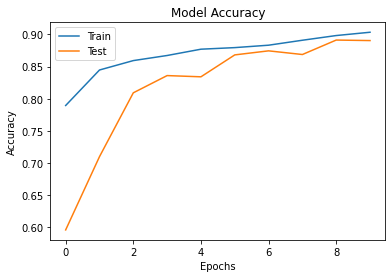

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

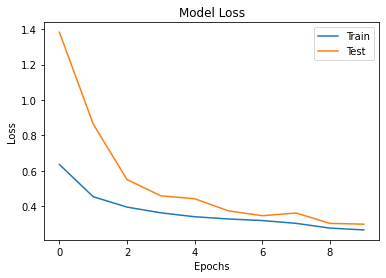

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

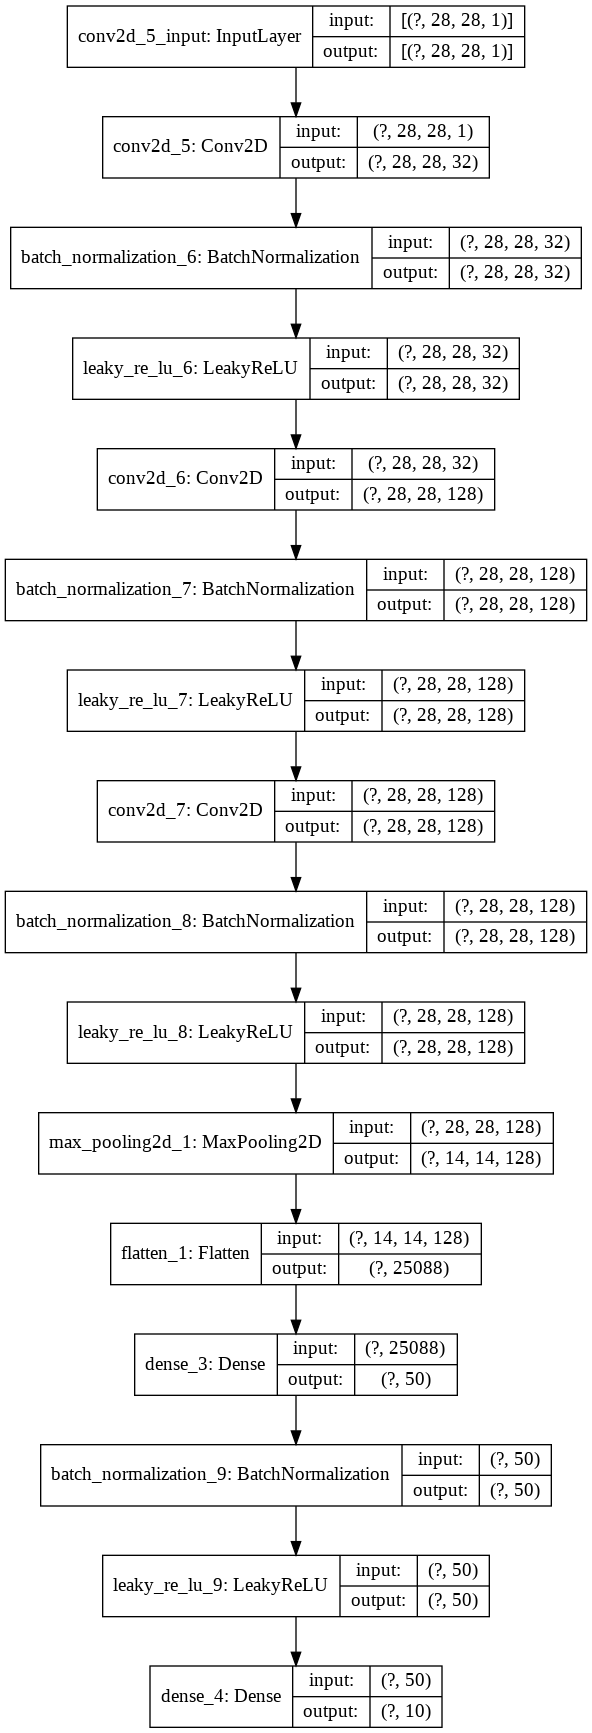

In [33]:
plot_model(model, to_file='fmnistcnn.png',show_shapes=True, show_layer_names=True)
#model.save("fmnist1.h5")

In [46]:
xtrain = X_train.reshape((-1, 28, 28, 1))
xtest = X_test.reshape((-1, 28, 28, 1))

# xtrain = xtrain.astype("float32")/255
# xtest = xtest.astype("float32")/255

ytrain = to_categorical(y_train, num_classes=10)
ytest = to_categorical(y_test, num_classes=10)

train_loss, train_acc = model.evaluate(xtrain, ytrain)
test_loss, test_acc = model.evaluate(xtest, ytest)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 58s 184ms/step - loss: 100.7576 - accuracy: 0.4118
Train accuracy: 0.4154
Train loss: 99
Test accuracy: 0.4118
Test loss: 100.758


In [ ]:
## from https://github.com/Chinmayrane16/Fashion-MNIST-Accuracy-93.4-/blob/master/Fashion-MNIST.ipynb

model2 = keras.Sequential()

model2.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same',
                  data_format='channels_last',
                  input_shape=(28,28,1)))
model2.add(BatchNormalization())

# model2.add(Conv2D(filters=32,
#                   kernel_size=(3, 3),
#                   activation='relu',
#                   strides=1,
#                   padding='same',
#                   data_format='channels_last'))
# model2.add(BatchNormalization())
# model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same',
                  data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
    
model2.add(Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same', 
                 data_format='channels_last'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

model2.summary

history2 = model2.fit(xtrain,
                      ytrain,
                      batch_size=128,
                      epochs=50,
                      validation_data=(xtest, ytest))
                      #verbose=2)
                      #steps_per_epoch=xtrain.shape[0] // 128)
                      #callbacks = [reduce_lr])